# Setup

In [0]:
!nvidia-smi

Fri May  8 07:44:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os

image_transformed_crops = 384
# Data augmentation and normalization for training
# Just normalization for validation & test
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(image_transformed_crops),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(image_transformed_crops),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

data_dir = "/content/drive/My Drive/FYP-Datasets/preprocessed/cleaned-set"

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'test']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
classes = image_datasets['train'].classes


# Display images

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataloaders['train'])
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# LilLuluNet

This neural network has a tendency to be the batch rep of the dataset. Proceed with extreme caution. These are few characteristics of the Network

1. Greedy Algorithm - AKA Lil Greedo
2. Chracterised by the being noisy
3. The network is remarkably thin, but still acts like a strong one
4. The network learns fast
5. The OPtimizers are of no use here
6. Smelly farts
7. Wins chocolates
8. 

## Tiny model

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomModel(nn.Module):
  def __init__(self, num_classes):
    super(CustomModel, self).__init__()
    self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
    self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
    self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
    self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.norm1 = nn.BatchNorm2d(3)
    self.norm2 = nn.BatchNorm2d(8)
    self.norm3 = nn.BatchNorm2d(16)
    self.norm4 = nn.BatchNorm2d(32)
    self.fc1 = nn.Linear(64* 24* 24, 128)

    self.fc2 = nn.Linear(132, 64)

    self.fc3 = nn.Linear(64, num_classes)

  def forward(self, img, data):
    img = self.pool(self.conv1(F.relu(self.norm1(img))))
    img = self.pool(self.conv2(F.relu(self.norm2(img))))
    img = self.pool(self.conv3(F.relu(self.norm3(img))))
    img = self.pool(self.conv4(F.relu(self.norm4(img))))
    # print(img.shape)
    img = img.view(img.size(0), -1)
    img = F.relu(self.fc1(img))
    out = torch.cat((img, data), 1)
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
    return out

## Small model

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class CustomModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomModel, self).__init__()
        self.conv0 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
        self.norm0 = nn.BatchNorm2d(32)
        self.conv1 = nn.Conv2d(32, 48, kernel_size=3, padding=1)
        self.norm1 = nn.BatchNorm2d(48)
        self.conv2 = nn.Conv2d(48, 64, kernel_size=3, padding=1)
        self.norm2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 48, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(48, 32, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(24* 24* 32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.norm0(F.relu(self.conv0(x)))
        x = self.pool(self.norm1(F.relu(self.conv1(x))))
        x = self.pool(self.norm2(F.relu(self.conv2(x))))
        x = self.pool(self.norm1(F.relu(self.conv3(x))))
        x = self.pool(self.norm0(F.relu(self.conv4(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x)
        return x

## Medium model

In [0]:
import torch
import torch.nn as nn

class CustomModelUnit(torch.nn.Module):
  def __init__(self, current_depth, new_depth):
    super(CustomModelUnit, self).__init__()
    self.norm1 = nn.BatchNorm2d(current_depth)
    self.conv1 = nn.Conv2d(current_depth, new_depth, kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU(inplace=True)

  def forward(self, x):
    out = self.norm1(x)
    out = self.conv1(out)
    out = self.relu1(out)
    return out

class CustomModel(torch.nn.Module):
  def __init__(self, num_classes, num_units=8, in_depth=32):
    super(CustomModel, self).__init__()
    self.conv0 = nn.Conv2d(3, in_depth, kernel_size=5, stride=1, padding=2)
    self.relu0 = nn.ReLU(inplace=True)
    self.norm0 = nn.BatchNorm2d(in_depth)

    unitDepth = in_depth
    self.layers = nn.Sequential()

    part = int(num_units/4)

    for i in range(part):
      self.layers.add_module('layer%d' % (i + 1), CustomModelUnit(current_depth=unitDepth, new_depth=(unitDepth+in_depth)))
      unitDepth = unitDepth + in_depth

    self.layers.add_module('pool', nn.MaxPool2d(kernel_size=2, stride=2))

    for i in range(part):
      self.layers.add_module('layer%d' % (i + 1 + part), CustomModelUnit(current_depth=unitDepth, new_depth=(unitDepth-in_depth)))
      unitDepth = unitDepth - in_depth

    self.layers.add_module('pool', nn.MaxPool2d(kernel_size=2, stride=2))

    for i in range(part):
      self.layers.add_module('layer%d' % (i + 1 + (part*2)), CustomModelUnit(current_depth=unitDepth, new_depth=(unitDepth+in_depth)))
      unitDepth = unitDepth + in_depth

    self.layers.add_module('pool', nn.MaxPool2d(kernel_size=2, stride=2))

    for i in range(part):
      self.layers.add_module('layer%d' % (i + 1 + (part*3)), CustomModelUnit(current_depth=unitDepth, new_depth=(unitDepth-in_depth)))
      unitDepth = unitDepth - in_depth
    
    self.linear = nn.Linear(num_units*in_depth, num_classes)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    out = self.conv0(x)
    out = self.relu0(out)
    out = self.norm0(out)
    out = self.layers(out)
    out = torch.flatten(out, 1)
    out = self.linear(out)
    out = self.softmax(out)
    return out

## Big model

In [0]:
import torch
import torch.nn as nn

class CustomModelUnit(torch.nn.Module):
  def __init__(self, current_depth, new_depth):
    super(CustomModelUnit, self).__init__()
    self.norm = nn.BatchNorm2d(current_depth)
    self.relu = nn.ReLU(inplace=True)
    self.conv = nn.Conv2d(current_depth, new_depth, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    out = self.conv(self.relu(self.norm(x)))
    return out

class CustomEnlargeUnit(torch.nn.Module):
  def __init__(self, current_depth, new_depth):
    super(CustomEnlargeUnit, self).__init__()
    self.ennorm = nn.BatchNorm2d(current_depth)
    self.enrelu = nn.ReLU(inplace=True)
    self.enconv = nn.Conv2d(current_depth, new_depth, kernel_size=5, stride=1, padding=2)

  def forward(self, x):
    out = self.enconv(self.enrelu(self.ennorm(x)))
    return out

class CustomModelLayer(torch.nn.ModuleDict):
  def __init__(self, num_units, in_depth, next_depth, enlarge):
    super(CustomModelLayer, self).__init__()
    for j in range(num_units):
      self.add_module('unit%d' % (j + 1), CustomModelUnit(current_depth=in_depth, new_depth=in_depth))

    if enlarge:
      self.add_module('enlarge', CustomEnlargeUnit(current_depth=in_depth, new_depth=next_depth))

  def forward(self, x):
    out = x
    for name, layer in self.items():
      out = layer(out)
    return out

class CustomModel(torch.nn.Module):
  def __init__(self, num_classes, num_layers=3, num_units=4, in_depth=16):
    super(CustomModel, self).__init__()
    self.conv0 = nn.Conv2d(3, in_depth, kernel_size=5, stride=1, padding=2)
    self.relu0 = nn.ReLU(inplace=True)
    self.norm0 = nn.BatchNorm2d(in_depth)
    self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.layers = nn.Sequential()
    previous_depth = in_depth
    for i in range(num_layers):
      next_depth = in_depth * (2**(i+1))
      self.layers.add_module('layer%d' % (i + 1), CustomModelLayer(num_units=num_units, in_depth=previous_depth, next_depth=next_depth, enlarge=(i<(num_layers-1))))
      previous_depth = next_depth
      self.layers.add_module('pool%d' % (i+1), nn.MaxPool2d(kernel_size=2, stride=2))
    self.linear1 = nn.Linear(64*16*16, 2048)
    self.linear2 = nn.Linear(2048, 512)
    self.classifier = nn.Linear(512, num_classes)

  def forward(self, x):
    out = self.pool0(self.norm0(self.relu0(self.conv0(x))))
    out = self.layers(out)
    # print(out.shape)
    out = out.view(out.size(0), -1)
    out = self.classifier(self.linear2(self.linear1(out)))
    return out

## ResNet

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def conv5x5(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """5x5 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=5, stride=stride,
                     padding=2, groups=groups, bias=False, dilation=dilation)
    
def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)



class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=16, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 16.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv5x5(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.relu(self.bn1(self.conv1(x)))

        out = self.relu(self.bn2(self.conv2(out)))
        
        out = self.bn3(self.conv3(out))

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=16):
        super(ResNet, self).__init__()
        
        norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 16
        self.dilation = 1
        
        replace_stride_with_dilation = [False, True, False]

        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.layer1 = self._make_layer(block, 16, layers[0])
        self.layer2 = self._make_layer(block, 32, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 64, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 128, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)
        

    def forward(self, x):
        x = self.maxpool(self.relu(self.bn1(self.conv1(x))))

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        x = F.softmax(x, dim=1)

        return x




def resnet_model(num_classes):
  model = ResNet(Bottleneck, [3, 4, 6, 3], num_classes=num_classes)
  return model

In [0]:
res_model = resnet_model(len(classes))
print(res_model)

## Usage

In [0]:
model_state_path = "/content/drive/My Drive/FYP-Datasets/models/resnet/vgg_test_state.pth"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = CustomModel(len(classes))
model = models.vgg16(num_classes=5)
model.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
import torch.optim as optim
from torch.optim import lr_scheduler

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) 

train_acc_values=[]


In [0]:
len(dataloaders['train'])

556

## Load state

In [0]:
state = torch.load(model_state_path)

model.load_state_dict(state["model"])

# optimizer.load_state_dict(state["optimizer"])

# scheduler.load_state_dict(state["scheduler"])

# train_acc_values = state["train_test_val"]

# print(train_acc_values)

<All keys matched successfully>

## Generate values

In [0]:
import random
import numpy as np
import torch

valueBounds = [
    {
        "latUpper": 9.131389578912426,
        "latLower": 8.746282083786772,
        "lngUpper": 80.80029159942133,
        "lngLower": 80.33131271758539,
        "hourUpper": 15,
        "hourLower": 13,
    },
    {
        "latUpper": 7.01828146856506,
        "latLower": 6.8247806330110565,
        "lngUpper": 80.08223722638462,
        "lngLower": 79.84774778546665,
        "hourUpper": 18,
        "hourLower": 16,
    },
    {
        "latUpper": 7.653309620021503,
        "latLower": 7.460081072027894,
        "lngUpper": 81.30038869668704,
        "lngLower": 81.06589925576907,
        "hourUpper": 9,
        "hourLower": 7,
    },
    {
        "latUpper": 6.474375436597032,
        "latLower": 6.2806602933845985,
        "lngUpper": 81.13958565154788,
        "lngLower": 80.9050962106299,
        "hourUpper": 12,
        "hourLower": 10,
    },
    {
        "latUpper": 7.922726768561008,
        "latLower": 7.536426691527857,
        "lngUpper": 80.54560428814645,
        "lngLower": 80.07662540631051,
        "hourUpper": 22,
        "hourLower": 20,
    }
]

def getRandomVal(upperBound, lowerBound, decimals):
  return round(random.uniform(lowerBound, upperBound), decimals)

def getRandomInt(upperBound, lowerBound):
  return random.randrange(lowerBound, upperBound)

def getLat(label):
  return getRandomVal(valueBounds[label]['latUpper'], valueBounds[label]['latLower'], 6)

def getLng(label):
  return getRandomVal(valueBounds[label]['lngUpper'], valueBounds[label]['lngLower'], 6)

def getHour(label):
  return getRandomInt(valueBounds[label]['hourUpper'], valueBounds[label]['hourLower'])


def generateValues(labels):
  values = []
  for x in range(len(labels)):
    label = labels[x]
    lat = getLat(label)
    lng = getLng(label)
    hour = getHour(label)
    minu = getRandomInt(59, 0)

    values.append([lat, lng, hour, minu])
  
  return np.array(values)

### Other stuff

In [0]:
def genRec(label):
  lat = getLat(label)
  lng = getLng(label)
  hour = getHour(label)
  minu = getRandomInt(59, 0)
  return [lat, lng, hour, minu]

def gen1000Rec():
  all_records = []
  for x in range(5):
    records = []
    for y in range(1000):
      records.append(genRec(x))
    
    all_records.append(records)

   return all_records 


In [0]:
all_gen_values = gen1000Rec()
print(len(all_gen_values))
print(len(all_gen_values[0]))
print(all_gen_values[0][10:])

def getAllAddData(labels):
  values = []
  for x in range(len(labels)):
    label = labels[x]
    values.append(all_gen_values[label][getRandomInt(1000,0)])
  
  return np.array(values)

# Training

In [0]:
from tqdm import tqdm
epochs = 30

model.train()

for epoch in range(epochs):  # loop over the dataset multiple times

    print("Epoch ", str(epoch+1))

    running_corrects = 0 
    running_loss = 0.0
    indx = 0
    
    for data in tqdm(dataloaders['train'],position=0,leave=True):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # addData = generateValues(labels.tolist())
        # dataTensor = torch.from_numpy(addData)
        # dataTensor = dataTensor.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        # outputs = model(inputs, dataTensor.float())
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)  

        # print statistics
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data) 

        epoch_loss = running_loss / dataset_sizes['train'] 
        epoch_acc = running_corrects.double() / dataset_sizes['train']
        
        if indx % 139 == 0:
          print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))
        indx += 1

    print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))
    scheduler.step()
    
    train_value = {
        "loss": epoch_loss,
        "accuracy": epoch_acc
    }

    train_acc_values.append(train_value)

    if (epoch+1)%2==0:
        state = {
            'epoch': epochs - epoch - 1,
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'scheduler': scheduler.state_dict(),
            'train_test_val': train_acc_values,
        }
        
        torch.save(state, model_state_path)

print(" ")
print('Finished Training')

  0%|          | 0/556 [00:00<?, ?it/s]

Epoch  1


  0%|          | 1/556 [00:01<18:19,  1.98s/it]

Loss: 0.0001 Acc: 0.0003


 25%|██▌       | 140/556 [01:48<05:18,  1.31it/s]

Loss: 0.0127 Acc: 0.0509


 50%|█████     | 279/556 [03:34<03:32,  1.30it/s]

Loss: 0.0252 Acc: 0.1023


 75%|███████▌  | 418/556 [05:21<01:45,  1.31it/s]

Loss: 0.0378 Acc: 0.1539


  0%|          | 0/556 [00:00<?, ?it/s]

Loss: 0.0503 Acc: 0.2029
Epoch  2


  0%|          | 1/556 [00:01<18:12,  1.97s/it]

Loss: 0.0001 Acc: 0.0004


 25%|██▌       | 140/556 [01:48<05:18,  1.30it/s]

Loss: 0.0127 Acc: 0.0527


 50%|█████     | 279/556 [03:34<03:31,  1.31it/s]

Loss: 0.0252 Acc: 0.1052


 75%|███████▌  | 418/556 [05:21<01:45,  1.31it/s]

Loss: 0.0378 Acc: 0.1570


100%|██████████| 556/556 [07:07<00:00,  1.30it/s]


Loss: 0.0503 Acc: 0.2070


  0%|          | 0/556 [00:00<?, ?it/s]

Epoch  3


  0%|          | 1/556 [00:02<21:40,  2.34s/it]

Loss: 0.0001 Acc: 0.0004


 25%|██▌       | 140/556 [01:49<05:18,  1.31it/s]

Loss: 0.0127 Acc: 0.0526


 50%|█████     | 279/556 [03:35<03:31,  1.31it/s]

Loss: 0.0252 Acc: 0.1045


 75%|███████▌  | 418/556 [05:22<01:45,  1.30it/s]

Loss: 0.0378 Acc: 0.1564


  0%|          | 0/556 [00:00<?, ?it/s]

Loss: 0.0503 Acc: 0.2072
Epoch  4


  0%|          | 1/556 [00:02<19:03,  2.06s/it]

Loss: 0.0001 Acc: 0.0003


 25%|██▌       | 140/556 [01:48<05:18,  1.31it/s]

Loss: 0.0127 Acc: 0.0491


 50%|█████     | 279/556 [03:34<03:32,  1.30it/s]

Loss: 0.0252 Acc: 0.1016


 75%|███████▌  | 418/556 [05:21<01:45,  1.31it/s]

Loss: 0.0378 Acc: 0.1522


100%|██████████| 556/556 [07:07<00:00,  1.30it/s]


Loss: 0.0503 Acc: 0.2031


  0%|          | 0/556 [00:00<?, ?it/s]

Epoch  5


  0%|          | 1/556 [00:02<25:17,  2.74s/it]

Loss: 0.0001 Acc: 0.0006


 25%|██▌       | 140/556 [01:49<05:18,  1.31it/s]

Loss: 0.0127 Acc: 0.0500


 50%|█████     | 279/556 [03:36<03:33,  1.30it/s]

Loss: 0.0252 Acc: 0.1043


 75%|███████▌  | 418/556 [05:22<01:45,  1.31it/s]

Loss: 0.0378 Acc: 0.1565


  0%|          | 0/556 [00:00<?, ?it/s]

Loss: 0.0503 Acc: 0.2086
Epoch  6


  0%|          | 1/556 [00:01<17:56,  1.94s/it]

Loss: 0.0001 Acc: 0.0002


 25%|██▌       | 140/556 [01:48<05:18,  1.31it/s]

Loss: 0.0127 Acc: 0.0491


 50%|█████     | 279/556 [03:34<03:32,  1.31it/s]

Loss: 0.0252 Acc: 0.1008


 75%|███████▌  | 418/556 [05:21<01:46,  1.30it/s]

Loss: 0.0378 Acc: 0.1503


100%|██████████| 556/556 [07:07<00:00,  1.30it/s]


Loss: 0.0503 Acc: 0.2022


  0%|          | 0/556 [00:00<?, ?it/s]

Epoch  7


  0%|          | 1/556 [00:02<20:33,  2.22s/it]

Loss: 0.0001 Acc: 0.0005


 25%|██▌       | 140/556 [01:48<05:18,  1.31it/s]

Loss: 0.0127 Acc: 0.0512


 50%|█████     | 279/556 [03:35<03:32,  1.30it/s]

Loss: 0.0252 Acc: 0.1037


 75%|███████▌  | 418/556 [05:21<01:46,  1.30it/s]

Loss: 0.0378 Acc: 0.1534


  0%|          | 0/556 [00:00<?, ?it/s]

Loss: 0.0503 Acc: 0.2048
Epoch  8


  0%|          | 1/556 [00:01<18:27,  2.00s/it]

Loss: 0.0001 Acc: 0.0005


 25%|██▌       | 140/556 [01:48<05:18,  1.31it/s]

Loss: 0.0127 Acc: 0.0512


 50%|█████     | 279/556 [03:35<03:32,  1.31it/s]

Loss: 0.0252 Acc: 0.1029


 75%|███████▌  | 418/556 [05:21<01:45,  1.30it/s]

Loss: 0.0378 Acc: 0.1539


100%|██████████| 556/556 [07:07<00:00,  1.30it/s]


Loss: 0.0503 Acc: 0.2069


  0%|          | 0/556 [00:00<?, ?it/s]

Epoch  9


  0%|          | 1/556 [00:02<22:11,  2.40s/it]

Loss: 0.0001 Acc: 0.0007


 25%|██▌       | 140/556 [01:49<05:18,  1.31it/s]

Loss: 0.0127 Acc: 0.0527


 50%|█████     | 279/556 [03:35<03:31,  1.31it/s]

Loss: 0.0252 Acc: 0.1035


 75%|███████▌  | 418/556 [05:21<01:45,  1.31it/s]

Loss: 0.0378 Acc: 0.1554


  0%|          | 0/556 [00:00<?, ?it/s]

Loss: 0.0503 Acc: 0.2089
Epoch  10


  0%|          | 1/556 [00:01<18:02,  1.95s/it]

Loss: 0.0001 Acc: 0.0003


 25%|██▌       | 140/556 [01:48<05:18,  1.30it/s]

Loss: 0.0127 Acc: 0.0525


 50%|█████     | 279/556 [03:34<03:32,  1.31it/s]

Loss: 0.0252 Acc: 0.1024


 75%|███████▌  | 418/556 [05:20<01:45,  1.31it/s]

Loss: 0.0378 Acc: 0.1559


100%|██████████| 556/556 [07:06<00:00,  1.30it/s]


Loss: 0.0503 Acc: 0.2077


  0%|          | 0/556 [00:00<?, ?it/s]

Epoch  11


  0%|          | 1/556 [00:02<21:48,  2.36s/it]

Loss: 0.0001 Acc: 0.0003


 25%|██▌       | 140/556 [01:49<05:18,  1.31it/s]

Loss: 0.0127 Acc: 0.0524


 40%|████      | 225/556 [02:54<04:13,  1.31it/s]

# Run the code between this ONLY if you want to save and load the model

In [0]:
import pickle
model_path = '/content/drive/My Drive/FYP-Datasets/models/finalized/vgg_model.pth'

In [0]:
# pickle.dump(model, open(filename, 'wb'))
torch.save(model.state_dict(), model_path)

In [0]:
model.load_state_dict(torch.load(model_path, map_location=device))

model.cuda()
# loaded_model = pickle.load(open(filename, 'rb'))

# Run the above code ONLY if you want to save and load the model

In [0]:
from sklearn.metrics import classification_report
from tqdm import tqdm
correct = 0
total = 0
actual = []
predicted = []
model.eval()
with torch.no_grad():
    for data in tqdm(dataloaders['test'],position=0,leave=True):
        images, labels = data[0].to(device), data[1].to(device)

        addData = generateValues(labels)
        dataTensor = torch.from_numpy(addData)
        dataTensor = dataTensor.to(device)

        outputs = model(images, dataTensor.float())
        _, preds = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
        predicted = predicted + preds.tolist()
        actual = actual + labels.tolist()
print()
print()

print('Accuracy of the network on the all test images: %d %%' % (100 * correct / total))

class_report = classification_report(actual, predicted, target_names=classes)

print()
print()
print(class_report)



100%|██████████| 556/556 [34:22<00:00,  3.71s/it]



Accuracy of the network on the all test images: 99 %


              precision    recall  f1-score   support

     class-1       1.00      1.00      1.00      3487
     class-2       1.00      1.00      1.00      3661
     class-3       1.00      1.00      1.00      3547
     class-4       1.00      1.00      1.00      3453
     class-5       1.00      1.00      1.00      3641

    accuracy                           1.00     17789
   macro avg       1.00      1.00      1.00     17789
weighted avg       1.00      1.00      1.00     17789



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


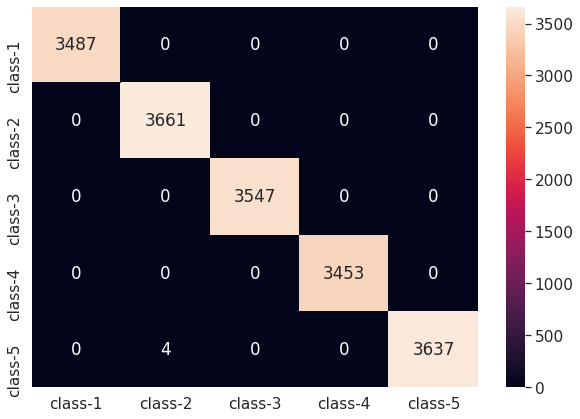

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

actual_label = list(map((lambda x: classes[x]), actual))
pred_label = list(map((lambda x: classes[x]), predicted))
conf_mat = confusion_matrix(actual_label, pred_label, classes)

df_cm = pd.DataFrame(conf_mat, classes, classes)

sn.set(font_scale=1.4) # for label size
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d") # font size

plt.show()

In [0]:
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
model.eval()
with torch.no_grad():
    for data in tqdm(dataloaders['test'],position=0,leave=True):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(2):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print()
for i in range(5):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))